# Analyze vouchers by zipcode 

Analysis for story

In [1]:
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt

## Data sources

Voucher data: processed in prep-voucher-data.ipynb file. The total number of vouchers here doesn't match up to HUD data, likely due to reporting differences? 
<br>
<br>
Child opportunity index zip code data: https://data.diversitydatakids.org/dataset/coi20_zipcodes-child-opportunity-index-2-0-zip-code-data?_ga=2.107389829.606836181.1655998081-1965355179.1655998081
<br>
Note: it is based on 2015 census data but 2020 zip code boundaries (weighted from census tracts)
<br>
<br>
Top ten eviction zipcodes from 2015-Mar 2020: https://www.azcentral.com/in-depth/money/real-estate/2022/04/22/metro-phoenix-zip-codes-had-most-eviction-filing-2015-2020/6656975001/
<br>
<br>
Census single vs. multi-family data (Table B25024) and owner vs. renter occupied data (Table B25003)

## Voucher distribution by zip code

In [2]:
#load data
vouchers = pd.read_csv('/Users/amyqin/Documents/data/processed/vouchers_census_data.csv')

In [3]:
vouchers.head()

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic
0,85003,132,0.192122,48306,0.556527,0.076078,0.035913,0.019019,0.000000,0.000236,0.018783,0.293444
1,85004,10,0.282776,52000,0.571689,0.049374,0.010215,0.067129,0.000000,0.003770,0.036361,0.261462
2,85006,259,0.296541,43567,0.257065,0.061540,0.012031,0.013830,0.000000,0.006859,0.016640,0.632037
3,85007,196,0.312386,35642,0.299933,0.111538,0.009447,0.022807,0.000000,0.002767,0.028408,0.525101
4,85008,418,0.210148,46724,0.279562,0.115152,0.024240,0.014668,0.000635,0.000873,0.023034,0.541837


In [4]:
vouchers.sort_values('Number of vouchers',ascending=False)

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic
78,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015
29,85041,568,0.162583,58438,0.133551,0.146775,0.009697,0.026308,0.000479,0.000263,0.017956,0.664971
69,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293
9,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,0.035106,0.472574
43,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668
...,...,...,...,...,...,...,...,...,...,...,...,...
99,85346,1,0.265263,20611,0.837193,0.000000,0.000000,0.014503,0.000000,0.000000,0.000000,0.148304
73,85293,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,85321,1,0.247315,37418,0.398089,0.000796,0.298567,0.001327,0.000000,0.000000,0.002123,0.299098
90,85325,1,0.086614,29696,0.982826,0.000000,0.000000,0.003903,0.000000,0.000000,0.013271,0.000000


In [5]:
#descriptive stats
vouchers['Number of vouchers'].mean()

96.68852459016394

In [6]:
vouchers['Number of vouchers'].median()

37.0

In [7]:
#total number of vouchers
vouchers['Number of vouchers'].sum()

11796

In [8]:
vouchers.shape

(122, 12)

The top five voucher zip codes account for roughly one-fifth of all 122 zip codes AKA the top 4% of zip codes account for 20% of all vouchers used.

In [9]:
#add percentage of total vouchers column
vouchers['percent'] = vouchers['Number of vouchers']/vouchers['Number of vouchers'].sum()

In [10]:
vouchers.sort_values('Number of vouchers',ascending=False).iloc[:20,:]

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent
78,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645
29,85041,568,0.162583,58438,0.133551,0.146775,0.009697,0.026308,0.000479,0.000263,0.017956,0.664971,0.048152
69,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183
9,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,0.035106,0.472574,0.039251
43,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668,0.036368
4,85008,418,0.210148,46724,0.279562,0.115152,0.024240,0.014668,0.000635,0.000873,0.023034,0.541837,0.035436
61,85251,330,0.103941,71662,0.729251,0.017311,0.011661,0.034694,0.002284,0.000890,0.027169,0.176741,0.027976
28,85040,328,0.295270,43127,0.130371,0.200203,0.025961,0.019294,0.005989,0.005932,0.011130,0.601119,0.027806
15,85021,320,0.208215,46358,0.420407,0.105024,0.036330,0.037446,0.004108,0.019898,0.028470,0.348316,0.027128
70,85282,304,0.133355,61700,0.564242,0.101674,0.020377,0.042491,0.004288,0.001595,0.033525,0.231807,0.025771


In [11]:
top_5 = vouchers.nlargest(5, columns='percent')
top_5['percent'].sum()

0.21659884706680232

In [12]:
#top 10 analysis
top_10 = vouchers.nlargest(10, columns='percent')
top_10['percent'].sum()

0.360715496778569

In [13]:
#add quartile analysis
vouchers['quartile'] = pd.qcut(vouchers['Number of vouchers'],4, labels=['fourth', 'third', 'second', 'first'])

The top quarter of zip codes based on the number of vouchers used in them had 8,376 vouchers used, accounting for 71% of the total. The next highest quartile accounted for 23% of the vouchers used. The bottom half accounted for less than 5% of the total.

In [14]:
vouchers.groupby('quartile').agg({'Number of vouchers':'sum'})

,Number of vouchers
quartile,
fourth,79
third,542
second,2799
first,8376


In [15]:
vouchers.groupby('quartile').agg({'percent':'sum'})

,percent
quartile,
fourth,0.006697
third,0.045948
second,0.237284
first,0.710071


In [16]:
vouchers.groupby('quartile').agg({'quartile':'count'})

,quartile
quartile,
fourth,31
third,30
second,30
first,31


## Poverty analysis

There is a small correlation between the number of vouchers issued and a zip codes poverty rate. 

Text(0, 0.5, 'pct_below_poverty')

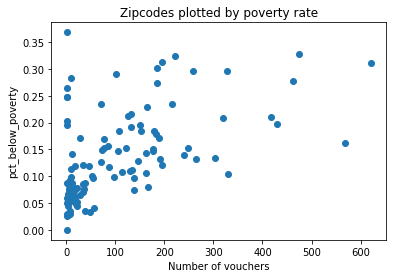

In [17]:
plt.scatter(vouchers['Number of vouchers'],vouchers['pct_below_poverty'])
plt.title('Zipcodes plotted by poverty rate')
plt.xlabel('Number of vouchers')
plt.ylabel('pct_below_poverty')

In [18]:
#pearsons correlation coefficient
vouchers['Number of vouchers'].corr(vouchers['pct_below_poverty'])

0.5443423256089944

Text(0.5, 0, 'pct_below_poverty')

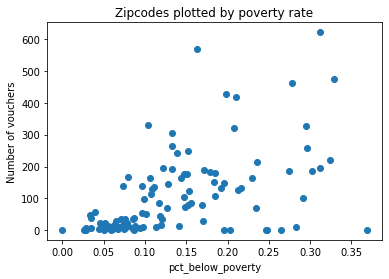

In [19]:
plt.scatter(vouchers['pct_below_poverty'],vouchers['Number of vouchers'])
plt.title('Zipcodes plotted by poverty rate')
plt.ylabel('Number of vouchers')
plt.xlabel('pct_below_poverty')

In [20]:
#pearsons correlation coefficient
vouchers['pct_below_poverty'].corr(vouchers['Number of vouchers'])

0.5443423256089943

The top five zip codes (top 4%) in terms of poverty rate account for 13% of all the vouchers issued in the metro phoenix area.
<br>
The top 10 zip codes (top 8%) in terms of poverty rate account for 20% of all the vouchers issued in the metro phoenix area. AKA the top zip voucher zip codes have disproportionate rates of people who live below the poverty line. 

In [21]:
vouchers.sort_values('pct_below_poverty',ascending=False).iloc[:10,:]

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile
93,85337,1,0.368362,41278,0.175635,0.035874,0.130419,0.000000,0.003363,0.025785,0.013079,0.615845,0.000085,fourth
69,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183,first
25,85034,222,0.324369,33140,0.209268,0.111438,0.018573,0.022067,0.000000,0.000000,0.009011,0.629643,0.018820,first
3,85007,196,0.312386,35642,0.299933,0.111538,0.009447,0.022807,0.000000,0.002767,0.028408,0.525101,0.016616,first
78,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645,first
11,85017,186,0.301794,41893,0.177274,0.075076,0.014702,0.037999,0.000000,0.001959,0.034496,0.658494,0.015768,first
2,85006,259,0.296541,43567,0.257065,0.061540,0.012031,0.013830,0.000000,0.006859,0.016640,0.632037,0.021957,first
28,85040,328,0.295270,43127,0.130371,0.200203,0.025961,0.019294,0.005989,0.005932,0.011130,0.601119,0.027806,first
5,85009,101,0.291377,38228,0.107352,0.032204,0.018574,0.003574,0.002204,0.001852,0.008037,0.826204,0.008562,second
1,85004,10,0.282776,52000,0.571689,0.049374,0.010215,0.067129,0.000000,0.003770,0.036361,0.261462,0.000848,third


In [22]:
top_5_poverty = vouchers.nlargest(5, columns='pct_below_poverty')
top_5_poverty['percent'].sum()

0.12834859274330282

In [23]:
top_10_poverty = vouchers.nlargest(10, columns='pct_below_poverty')
top_10_poverty['percent'].sum()

0.20328925059342148

In [24]:
vouchers.groupby('quartile').agg({'pct_below_poverty':'mean'})

,pct_below_poverty
quartile,
fourth,0.105710
third,0.084992
second,0.135646
first,0.200923


On average, the top quartile of zip codes for voucher use has almost double the percent population living below the poverty line than metro Phoenix does (12.7%) https://censusreporter.org/profiles/31000US38060-phoenix-mesa-chandler-az-metro-area/

In [25]:
#low poverty = poverty rate below 10%
#https://www.cbpp.org/research/housing/where-families-with-children-use-housing-vouchers#_ftn7
low_poverty_vouchers = vouchers[vouchers['pct_below_poverty'] < .1]
low_poverty_vouchers['percent'].sum()

0.10723974228552051

Only 11% of vouchers used are in low-poverty zip codes. low poverty zip codes are where the poverty rate is below 10%, according to the Center on Budget and Policy Priorities. 

## Evictions analysis

Pre-pandemic evictions data is Jan 2015 through Mar 2020. Pandemic evictions data is Mar 2020 through Feb 2021. 

In [26]:
#load pre-pandemic evictions data
evictions = pd.read_csv('/Users/amyqin/Documents/data/manual/top_eviction_zipcodes.csv', header=0)

In [27]:
evictions

,zipcode,filings
0,85301,14245
1,85035,11165
2,85281,11141
3,85008,8259
4,85225,8081
5,85201,8004
6,85202,7802
7,85033,7781
8,85021,7771
9,85029,7733


In [28]:
vouchers_sorted = vouchers.sort_values('Number of vouchers',ascending=False)

In [29]:
#add rank column, method=max_rank which means rows with same value are ranked with the lowest rank
vouchers_sorted['max_rank'] = vouchers_sorted['Number of vouchers'].rank(method='max',ascending=False)

In [30]:
vouchers_sorted.head()

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,max_rank
78,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645,first,1.0
29,85041,568,0.162583,58438,0.133551,0.146775,0.009697,0.026308,0.000479,0.000263,0.017956,0.664971,0.048152,first,2.0
69,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183,first,3.0
9,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,0.035106,0.472574,0.039251,first,4.0
43,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668,0.036368,first,5.0


In [31]:
#merge evictions data
vouchers_evictions = pd.merge(vouchers_sorted,evictions,how='left',left_on='Zip code',right_on='zipcode')

In [97]:
vouchers_evictions.head(10)

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,max_rank,zipcode,filings
0,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645,first,1.0,85301.0,14245.0
1,85041,568,0.162583,58438,0.133551,0.146775,0.009697,0.026308,0.000479,0.000263,0.017956,0.664971,0.048152,first,2.0,NaN,NaN
2,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183,first,3.0,85281.0,11141.0
3,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,0.035106,0.472574,0.039251,first,4.0,NaN,NaN
4,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668,0.036368,first,5.0,85201.0,8004.0
5,85008,418,0.210148,46724,0.279562,0.115152,0.024240,0.014668,0.000635,0.000873,0.023034,0.541837,0.035436,first,6.0,85008.0,8259.0
6,85251,330,0.103941,71662,0.729251,0.017311,0.011661,0.034694,0.002284,0.000890,0.027169,0.176741,0.027976,first,7.0,NaN,NaN
7,85040,328,0.295270,43127,0.130371,0.200203,0.025961,0.019294,0.005989,0.005932,0.011130,0.601119,0.027806,first,8.0,NaN,NaN
8,85021,320,0.208215,46358,0.420407,0.105024,0.036330,0.037446,0.004108,0.019898,0.028470,0.348316,0.027128,first,9.0,85021.0,7771.0
9,85282,304,0.133355,61700,0.564242,0.101674,0.020377,0.042491,0.004288,0.001595,0.033525,0.231807,0.025771,first,10.0,NaN,NaN


The zipcode with the highest evictions is also the zip code with the most number of vouchers used. All of the top evicting zipcodes (minus one from Chandler) are in the top 40 zipcodes that recieve vouchers. 

In [33]:
#top 10 eviction zipcodes sorted by most evictions to least
#missing one eviction zipcode, 85225
top_9 = vouchers_evictions.dropna().sort_values('filings',ascending=False)

In [34]:
top_9

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,max_rank,zipcode,filings
0,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645,first,1.0,85301.0,14245.0
27,85035,165,0.229317,45754,0.078213,0.081338,0.019723,0.006788,0.001042,0.000000,0.017917,0.794979,0.013988,first,28.0,85035.0,11165.0
2,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183,first,3.0,85281.0,11141.0
5,85008,418,0.210148,46724,0.279562,0.115152,0.024240,0.014668,0.000635,0.000873,0.023034,0.541837,0.035436,first,6.0,85008.0,8259.0
4,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668,0.036368,first,5.0,85201.0,8004.0
31,85202,150,0.195592,54047,0.497839,0.061818,0.048905,0.030022,0.010890,0.002398,0.027175,0.320953,0.012716,second,32.0,85202.0,7802.0
39,85033,127,0.212580,45492,0.115410,0.040271,0.014568,0.005498,0.000000,0.003526,0.007750,0.812978,0.010766,second,40.0,85033.0,7781.0
8,85021,320,0.208215,46358,0.420407,0.105024,0.036330,0.037446,0.004108,0.019898,0.028470,0.348316,0.027128,first,9.0,85021.0,7771.0
23,85029,179,0.184509,50067,0.529333,0.062704,0.020971,0.028270,0.001199,0.002840,0.032183,0.322501,0.015175,first,24.0,85029.0,7733.0


In [35]:
#85225 is not in my vouchers data because it's a chandler zipcode and we never got data back from chandler
vouchers_evictions[vouchers_evictions['Zip code']==85225]

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,max_rank,zipcode,filings


The top 9 eviciting zip codes account for 24% percent of all vouchers in the Valley.

In [36]:
top_9['percent'].sum()

0.24440488301119026

In [37]:
#load pandemic evictions data
evictions_pandemic = pd.read_csv('/Users/amyqin/Documents/data/manual/top_eviction_zipcodes_pandemic.csv', header=0)

In [38]:
evictions_pandemic

,zipcode,filings
0,85301,1517
1,85281,1245
2,85035,1240
3,85017,833
4,85033,797
5,85201,701
6,85021,680
7,85022,676
8,85008,669
9,85015,642


In [39]:
#do the same analysis
vouchers_evictions_pandemic = pd.merge(vouchers_sorted,evictions_pandemic,how='left',left_on='Zip code',right_on='zipcode')

In [40]:
vouchers_evictions_pandemic.head()

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,max_rank,zipcode,filings
0,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645,first,1.0,85301.0,1517.0
1,85041,568,0.162583,58438,0.133551,0.146775,0.009697,0.026308,0.000479,0.000263,0.017956,0.664971,0.048152,first,2.0,NaN,NaN
2,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183,first,3.0,85281.0,1245.0
3,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,0.035106,0.472574,0.039251,first,4.0,85015.0,642.0
4,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668,0.036368,first,5.0,85201.0,701.0


In [41]:
top_10 = vouchers_evictions_pandemic.dropna().sort_values('filings',ascending=False)

In [42]:
top_10

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,max_rank,zipcode,filings
0,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645,first,1.0,85301.0,1517.0
2,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183,first,3.0,85281.0,1245.0
27,85035,165,0.229317,45754,0.078213,0.081338,0.019723,0.006788,0.001042,0.000000,0.017917,0.794979,0.013988,first,28.0,85035.0,1240.0
20,85017,186,0.301794,41893,0.177274,0.075076,0.014702,0.037999,0.000000,0.001959,0.034496,0.658494,0.015768,first,21.0,85017.0,833.0
39,85033,127,0.212580,45492,0.115410,0.040271,0.014568,0.005498,0.000000,0.003526,0.007750,0.812978,0.010766,second,40.0,85033.0,797.0
4,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668,0.036368,first,5.0,85201.0,701.0
8,85021,320,0.208215,46358,0.420407,0.105024,0.036330,0.037446,0.004108,0.019898,0.028470,0.348316,0.027128,first,9.0,85021.0,680.0
57,85022,46,0.118659,57660,0.668776,0.045929,0.007211,0.031987,0.001342,0.002282,0.034960,0.207514,0.003900,second,58.0,85022.0,676.0
5,85008,418,0.210148,46724,0.279562,0.115152,0.024240,0.014668,0.000635,0.000873,0.023034,0.541837,0.035436,first,6.0,85008.0,669.0
3,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,0.035106,0.472574,0.039251,first,4.0,85015.0,642.0


In [43]:
top_10['percent'].sum()

0.2754323499491353

The top 10 eviciting zip codes during the pandemic account for 28% percent of all vouchers in the Valley

## Child opportunity analysis

About the Child Opprtunity Index (COI): it is a composite index of neighborhood opportunity published by diversitydatakids.org
<br>
It compares the level of opportunity that neighborhoods provide in a single metric, based on educational, socio-economic, health & environment indicators. Child Opportunity Levels measure 5 categories of opportunity compared on a national basis. 
<br>
<br>
Data Dictionary here: https://data.diversitydatakids.org/dataset/coi20_zipcodes-child-opportunity-index-2-0-zip-code-data/resource/75dd5483-2844-4fe4-85b0-49c8424edafa#dictionary_anchor

In [103]:
#child opportunity index by zip code data
coi = pd.read_csv('/Users/amyqin/Documents/data/source/child_opp_index_2020_zipcodes/2020.csv',)

Relevant columns:
<ul>
    <li>c5_coi_stt: overall child opp levels state normed</li>
    <li>c5_coi_met: overall child opp levels metro normed</li>
    <li>r_coi_nat: overall child opp numeric score state normed</li>
</ul>

In [104]:
coi.head()

,zip,msaid15,msaname15,statefips,stateusps,pop,aian,api,black,hisp,...,r_se_nat,r_coi_nat,c5_ed_stt,c5_he_stt,c5_se_stt,c5_coi_stt,c5_ed_met,c5_he_met,c5_se_met,c5_coi_met
0,501,35620.0,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36,NY,0.418301,0.000000,0.006080,0.000000,0.162335,...,83,77,Moderate,Moderate,Very High,High,Moderate,Moderate,Very High,High
1,1001,44140.0,"Springfield, MA Metro Area",25,MA,3348.816200,0.000000,182.210360,13.586505,432.109470,...,69,70,Low,Moderate,Moderate,Moderate,Moderate,Moderate,High,High
2,1002,44140.0,"Springfield, MA Metro Area",25,MA,3673.406300,64.088737,432.364650,341.595790,315.291810,...,43,62,High,Low,Low,Low,Very High,Low,Moderate,Moderate
3,1003,44140.0,"Springfield, MA Metro Area",25,MA,88.413177,0.083517,26.126003,19.088234,5.120953,...,9,17,High,Very Low,Very Low,Very Low,Very High,Very Low,Low,Low
4,1004,44140.0,"Springfield, MA Metro Area",25,MA,182.757630,0.000000,0.000000,11.966273,5.076601,...,41,60,High,Very Low,Low,Low,Very High,Low,Moderate,Moderate


In [105]:
#merge coi with vouchers data
vouchers_coi = pd.merge(vouchers, coi[['zip','c5_coi_stt', 'c5_coi_met', 'r_coi_nat']], how='left', left_on='Zip code', right_on='zip')
vouchers_coi = vouchers_coi.drop('zip', axis=1)

In [106]:
vouchers_coi.sort_values('Number of vouchers',ascending=False).head(10)

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,c5_coi_stt,c5_coi_met,r_coi_nat
78,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645,first,Very Low,Very Low,3.0
29,85041,568,0.162583,58438,0.133551,0.146775,0.009697,0.026308,0.000479,0.000263,0.017956,0.664971,0.048152,first,Low,Low,14.0
69,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183,first,Low,Low,23.0
9,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,0.035106,0.472574,0.039251,first,Very Low,Very Low,7.0
43,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668,0.036368,first,Low,Low,15.0
4,85008,418,0.210148,46724,0.279562,0.115152,0.024240,0.014668,0.000635,0.000873,0.023034,0.541837,0.035436,first,Very Low,Very Low,8.0
61,85251,330,0.103941,71662,0.729251,0.017311,0.011661,0.034694,0.002284,0.000890,0.027169,0.176741,0.027976,first,High,High,54.0
28,85040,328,0.295270,43127,0.130371,0.200203,0.025961,0.019294,0.005989,0.005932,0.011130,0.601119,0.027806,first,Very Low,Very Low,5.0
15,85021,320,0.208215,46358,0.420407,0.105024,0.036330,0.037446,0.004108,0.019898,0.028470,0.348316,0.027128,first,Low,Low,13.0
70,85282,304,0.133355,61700,0.564242,0.101674,0.020377,0.042491,0.004288,0.001595,0.033525,0.231807,0.025771,first,Moderate,Moderate,42.0


In [48]:
#vouchers by statewide COI levels
vouchers_coi.groupby('c5_coi_stt').agg({'percent':'sum'})

,percent
c5_coi_stt,
High,0.111563
Low,0.283655
Moderate,0.247033
Very High,0.025771
Very Low,0.331129


35% of all voucher holders live in very low opportunity areas. 31% live in low opportunity areas. 66% of all vouchers holders live in low or very low opportunity areas for metro Phoenix, disproportionate to the overall child population which is about eqaul to 20% for each of the five levels. Only 11% (9% + 2%) live in high or very high opportunity areas. 
<br>
Note: Using metro Phoenix as a COI comparison is more accurate because cost of living, etc. is different across the state which includes more rural regions. 

In [49]:
#vouchers by metro Phoenix COI levels
vouchers_coi.groupby('c5_coi_met').agg({'percent':'sum'})

,percent
c5_coi_met,
High,0.089776
Low,0.313750
Moderate,0.218633
Very High,0.024585
Very Low,0.352068


## Race analysis

Not sure if we will include because we don't know the race of the voucher holders themselves.

In [50]:
#pearsons correlation coefficient
vouchers['pct_white'].corr(vouchers['Number of vouchers'])

-0.5087357393437368

Text(0, 0.5, 'pct_white')

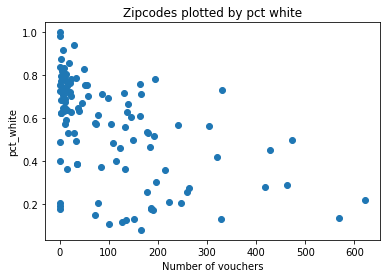

In [51]:
plt.scatter(vouchers['Number of vouchers'],vouchers['pct_white'])
plt.title('Zipcodes plotted by pct white')
plt.xlabel('Number of vouchers')
plt.ylabel('pct_white')

In [52]:
#black
vouchers['pct_black'].corr(vouchers['Number of vouchers'])

0.5935176019218577

Text(0, 0.5, 'pct_black')

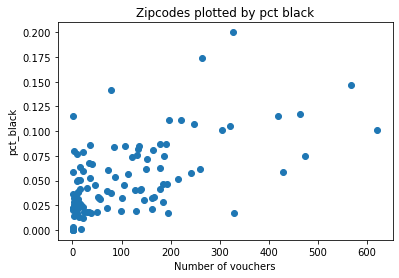

In [53]:
plt.scatter(vouchers['Number of vouchers'],vouchers['pct_black'])
plt.title('Zipcodes plotted by pct black')
plt.xlabel('Number of vouchers')
plt.ylabel('pct_black')

In [54]:
#hispanic
vouchers['pct_hispanic'].corr(vouchers['Number of vouchers'])

0.4463202182372929

Text(0, 0.5, 'pct_hispanic')

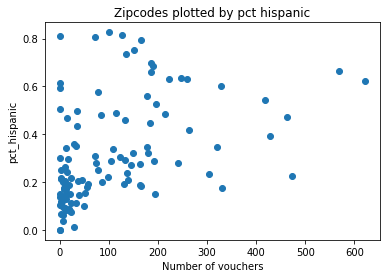

In [55]:
plt.scatter(vouchers['Number of vouchers'],vouchers['pct_hispanic'])
plt.title('Zipcodes plotted by pct hispanic')
plt.xlabel('Number of vouchers')
plt.ylabel('pct_hispanic')

In [56]:
#racial composition of top 5 voucher zip codes
vouchers_sorted

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,max_rank
78,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645,first,1.0
29,85041,568,0.162583,58438,0.133551,0.146775,0.009697,0.026308,0.000479,0.000263,0.017956,0.664971,0.048152,first,2.0
69,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183,first,3.0
9,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,0.035106,0.472574,0.039251,first,4.0
43,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668,0.036368,first,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,85346,1,0.265263,20611,0.837193,0.000000,0.000000,0.014503,0.000000,0.000000,0.000000,0.148304,0.000085,fourth,122.0
73,85293,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000085,fourth,122.0
87,85321,1,0.247315,37418,0.398089,0.000796,0.298567,0.001327,0.000000,0.000000,0.002123,0.299098,0.000085,fourth,122.0
90,85325,1,0.086614,29696,0.982826,0.000000,0.000000,0.003903,0.000000,0.000000,0.013271,0.000000,0.000085,fourth,122.0


## Margin of error analysis

Calculating the difference between HUD totals and PHA reported totals. This analysis is done in the google sheets.
<br>
Some PHAs are more accurate, Phoenix is within 0.6%, but others are not, Glendale is 17% off. Overall, for metro Phoenix the margin of error is 15%.

In [57]:
vouchers_pha = pd.read_csv('/Users/amyqin/Documents/data/processed/vouchers.csv')
vouchers_pha.groupby('PHA')['Number of vouchers'].sum()

PHA
Glendale           1194
Maricopa County    1324
Mesa               1446
Phoenix            6152
Scottsdale          569
Tempe               870
mesa                241
Name: Number of vouchers, dtype: int64

## Ownership analysis

In [58]:
#are there a greater number of renter occupied units by % in the top zipcodes compared to average, and vice versa? What is the correlation? 

In [59]:
#breakdown for Phoenix MSA
ownership_msa_dict = {
    'type': ['owner occupied', 'renter occupied'],
    'estimate': [1123410, 621809]
}

ownership_msa = pd.DataFrame(ownership_msa_dict)

In [60]:
ownership_msa['percent'] = ownership_msa['estimate']/ownership_msa['estimate'].sum()

In [61]:
ownership_msa

,type,estimate,percent
0,owner occupied,1123410,0.643707
1,renter occupied,621809,0.356293


In [62]:
#read in zipcode data
filepath = '/Users/amyqin/Documents/data/processed/unit_occupancy_AZ_2020_census/ACSDT5Y2020.B25003_data_with_overlays_2022-07-20T125940.csv'
occupancy = pd.read_csv(filepath, skiprows=1)

In [63]:
#merge occupancy with vouchers
vouchers_occupancy = pd.merge(vouchers, occupancy[['Zip code','Estimate!!Total:', 'Estimate!!Total:!!Owner occupied', 'Estimate!!Total:!!Renter occupied']], 
                             how='left', left_on='Zip code', right_on='Zip code')

In [64]:
vouchers_occupancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Zip code                           122 non-null    int64   
 1   Number of vouchers                 122 non-null    int64   
 2   pct_below_poverty                  113 non-null    float64 
 3   median_income                      113 non-null    object  
 4   pct_white                          113 non-null    float64 
 5   pct_black                          113 non-null    float64 
 6   pct_native                         113 non-null    float64 
 7   pct_asian                          113 non-null    float64 
 8   pct_islander                       113 non-null    float64 
 9   pct_other                          113 non-null    float64 
 10  pct_two                            113 non-null    float64 
 11  pct_hispanic                       113 non-nu

In [65]:
vouchers_occupancy.head()

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,Estimate!!Total:,Estimate!!Total:!!Owner occupied,Estimate!!Total:!!Renter occupied
0,85003,132,0.192122,48306,0.556527,0.076078,0.035913,0.019019,0.000000,0.000236,0.018783,0.293444,0.011190,second,4378.0,1525.0,2853.0
1,85004,10,0.282776,52000,0.571689,0.049374,0.010215,0.067129,0.000000,0.003770,0.036361,0.261462,0.000848,third,3584.0,933.0,2651.0
2,85006,259,0.296541,43567,0.257065,0.061540,0.012031,0.013830,0.000000,0.006859,0.016640,0.632037,0.021957,first,9471.0,3664.0,5807.0
3,85007,196,0.312386,35642,0.299933,0.111538,0.009447,0.022807,0.000000,0.002767,0.028408,0.525101,0.016616,first,5196.0,1924.0,3272.0
4,85008,418,0.210148,46724,0.279562,0.115152,0.024240,0.014668,0.000635,0.000873,0.023034,0.541837,0.035436,first,22950.0,6465.0,16485.0


In [66]:
#calculate aggregate statistics
grouped = vouchers_occupancy.groupby('quartile').agg({'Estimate!!Total:':'sum','Estimate!!Total:!!Owner occupied':'sum', 
                                            'Estimate!!Total:!!Renter occupied': 'sum'})

In [67]:
#calcuate percents
grouped['pct_owner'] = grouped['Estimate!!Total:!!Owner occupied']/grouped['Estimate!!Total:']
grouped['pct_renter'] = grouped['Estimate!!Total:!!Renter occupied']/grouped['Estimate!!Total:']

In [68]:
grouped

,Estimate!!Total:,Estimate!!Total:!!Owner occupied,Estimate!!Total:!!Renter occupied,pct_owner,pct_renter
quartile,,,,,
fourth,157925.0,128645.0,29280.0,0.814596,0.185404
third,348672.0,249898.0,98774.0,0.716714,0.283286
second,413626.0,247091.0,166535.0,0.597378,0.402622
first,496932.0,248448.0,248484.0,0.499964,0.500036


In [69]:
#compare with entire msa
ownership_msa

,type,estimate,percent
0,owner occupied,1123410,0.643707
1,renter occupied,621809,0.356293


There is a much higher share of renter occupied units, compared to the metro area, in the top 2 quartiles of zip codes. 50% of units in the top quartile of voucher zip codes, which represent where 71% of vouchers go, are renter occupied compared to an average of 36% of units in the metro area being renter occupied. 
<br>
Among the lowest two quartiles of voucher zip codes, they have lower renter occupancy and a much higher share of owner occupied unis compared to the metro area overall. 

In [70]:
#vouchers as a percentage of renter occupied units

In [71]:
vouchers_occupancy['vouchers_pct_renters'] = vouchers_occupancy['Number of vouchers']/vouchers_occuancy['Estimate!!Total:!!Renter occupied']

NameError: name 'vouchers_occuancy' is not defined

In [ ]:
vouchers_occupancy_sorted_30 = vouchers_occupancy.sort_values('vouchers_pct_renters',ascending=False).iloc[:30,:]

In [ ]:
vouchers_occupancy_sorted_30['Number of vouchers'].sum()

In [ ]:
vouchers_occupancy_sorted_30['percent'].sum()

In [ ]:
vouchers_occupancy_sorted_30['pct_below_poverty'].median()

In [ ]:
vouchers_occupancy_sorted_30

But, even after normalizing for renter occupied units e.g., making it the denominator, the top quartile of zips with the highest share of vouchers out of renter occupied units still represents 58% of all vouchers used, meaning even when accounting for the distribution of renter occupied units, voucher usage is still concentrated in the top quartile of zip codes. These zip codes also have a greater amount of people living below the poverty line.

## Unit type analysis

Single family vs. multi-family Table B25024

In [ ]:
#read in zipcode data for phx msa
filepath = '/Users/amyqin/Documents/data/processed/structure_type_ZCTA_2020_census/ACSDT5Y2020.B25024_data_with_overlays_2022-07-26T200823.csv'
structure = pd.read_csv(filepath, skiprows=1)

In [ ]:
#clean up into single vs multi vs mobile vs rv
structure['single'] = structure['Estimate!!Total:!!1, detached'] + structure['Estimate!!Total:!!1, attached']
structure['multi'] = structure['Estimate!!Total:!!2'] + structure['Estimate!!Total:!!3 or 4'] + structure['Estimate!!Total:!!5 to 9'] + structure['Estimate!!Total:!!10 to 19'] + structure['Estimate!!Total:!!20 to 49'] + structure['Estimate!!Total:!!50 or more']

In [ ]:
#merge with voucher data
vouchers_structure = pd.merge(vouchers, structure, how = 'left', left_on='Zip code', right_on='Zip code')

In [ ]:
#calculate aggregate statistics
grouped = vouchers_structure.groupby('quartile').agg({'Estimate!!Total:':'sum','single':'sum', 
                                            'multi': 'sum'})

In [ ]:
grouped

In [ ]:
#calclate percents
grouped['pct_single'] = grouped['single']/grouped['Estimate!!Total:']
grouped['pct_multi'] = grouped['multi']/grouped['Estimate!!Total:']

There is a much higher share of single family units in the bottom quartile of voucher zip codes (although the difference is smaller than occupancy)

In [ ]:
grouped

## Redlining

Based on the zip codes in Catherine's redlining story: https://www.azcentral.com/in-depth/money/real-estate/2022/04/18/effects-redlining-still-being-felt-south-phoenix-more-than-50-years-later/7293622001/

In [ ]:
vouchers[vouchers['Zip code']==85007]

In [ ]:
vouchers[vouchers['Zip code']==85009]

In [ ]:
vouchers[vouchers['Zip code']==85034]

In [ ]:
vouchers[vouchers['Zip code']==85040]

In [ ]:
vouchers[vouchers['Zip code']==85041]

## Rents analysis

There are two data sources for rents - Zumper and Zillow. Zumper has median rents in July of each year from 2016-2022 for 1 and 2 beds, but is less complete in zip code coverage. Zillow has monthly rental averages (all bedroom sizes) for each month going back to 2014, and has more zip codes but not full coverage. 
<bk>
<bk>
I should ask Zumper for data on voucher zip codes, not just metro phx

### Compare Zillow vs. Zumper

In [74]:
#read in zumper data
pathname = '/Users/amyqin/Documents/data/processed/zumper_phx_rents_zip_july_2016_2022.csv'
zumper = pd.read_csv(pathname, header=0)

In [79]:
#see how many missing zumper zips there are in voucher data using sets
subset = set(vouchers['Zip code']).difference(set(zumper['Zipcode']))

In [82]:
len(subset)

86

There are 86 missing voucher zip codes from zumper data for one beds

In [85]:
#read in Zillow data
pathname = '/Users/amyqin/Documents/data/source/Zip_ZORI_AllHomesPlusMultifamily_Smoothed (3).csv'
zillow = pd.read_csv(pathname, header = 0)

In [87]:
zillow.head()

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
0,61639,10025,1,"New York, NY",3085.0,3005.0,3096.0,3120.0,3111.0,3115.0,...,3418.0,3479.0,3517.0,3561.0,3591.0,3688.0,3744.0,3778.0,3843.0,3911.0
1,84654,60657,2,"Chicago, IL",1535.0,1572.0,1571.0,1580.0,1596.0,1633.0,...,1840.0,1834.0,1851.0,1858.0,1898.0,1902.0,1937.0,1959.0,1985.0,2001.0
2,61637,10023,3,"New York, NY",3206.0,3224.0,3266.0,3256.0,3275.0,3335.0,...,3583.0,3679.0,3673.0,3752.0,3799.0,3832.0,3885.0,3898.0,3981.0,4021.0
3,91982,77494,4,"Houston, TX",1487.0,1553.0,1561.0,1569.0,1542.0,1529.0,...,1735.0,1763.0,1789.0,1783.0,1774.0,1790.0,1789.0,1815.0,1830.0,1840.0
4,84616,60614,5,"Chicago, IL",1633.0,1659.0,1670.0,1682.0,1702.0,1719.0,...,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0


In [98]:
#check that RegionName is zip code
zillow[zillow['RegionName'] == 85251]

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
249,94843,85251,350,"Phoenix, AZ",974.0,1071.0,NaN,975.0,989.0,990.0,...,1915.0,1981.0,2022.0,2023.0,2043.0,2046.0,2037.0,1987.0,1986.0,1994.0


In [89]:
#see how many missing zillow zips there are in voucher data using sets
subset = set(vouchers['Zip code']).difference(set(zillow['RegionName']))
len(subset)

32

In [90]:
vouchers_zillow = pd.merge(vouchers_sorted,zillow,how='left',left_on='Zip code',right_on='RegionName')

In [99]:
vouchers_zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Columns: 121 entries, Zip code to 2022-06
dtypes: category(1), float64(116), int64(2), object(2)
memory usage: 115.6+ KB


In [92]:
vouchers_zillow.head(30)

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
0,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,...,1217.0,1260.0,1285.0,1282.0,1283.0,1262.0,1293.0,1336.0,1331.0,1328.0
1,85041,568,0.162583,58438,0.133551,0.146775,0.009697,0.026308,0.000479,0.000263,...,2035.0,2022.0,1987.0,2013.0,2066.0,2071.0,2117.0,2156.0,2205.0,2148.0
2,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,...,1916.0,1928.0,1941.0,1948.0,1964.0,1961.0,1965.0,2018.0,2034.0,2024.0
3,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,...,1300.0,1272.0,1331.0,1350.0,1403.0,1414.0,1478.0,1447.0,1447.0,1445.0
4,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,...,1465.0,1455.0,1493.0,1503.0,1519.0,1453.0,1506.0,1565.0,1609.0,1611.0
5,85008,418,0.210148,46724,0.279562,0.115152,0.024240,0.014668,0.000635,0.000873,...,1563.0,1590.0,1640.0,1646.0,1620.0,1627.0,1648.0,1689.0,1699.0,1712.0
6,85251,330,0.103941,71662,0.729251,0.017311,0.011661,0.034694,0.002284,0.000890,...,1915.0,1981.0,2022.0,2023.0,2043.0,2046.0,2037.0,1987.0,1986.0,1994.0
7,85040,328,0.295270,43127,0.130371,0.200203,0.025961,0.019294,0.005989,0.005932,...,1712.0,1718.0,1692.0,1694.0,1668.0,1761.0,1789.0,1826.0,1863.0,1870.0
8,85021,320,0.208215,46358,0.420407,0.105024,0.036330,0.037446,0.004108,0.019898,...,1373.0,1381.0,1366.0,1392.0,1429.0,1456.0,1441.0,1413.0,1433.0,1426.0
9,85282,304,0.133355,61700,0.564242,0.101674,0.020377,0.042491,0.004288,0.001595,...,1752.0,1748.0,1763.0,1780.0,1787.0,1764.0,1757.0,1766.0,1793.0,1797.0


There are only 32 missing zip codes, and all the top quarter of zip codes match minus 3, all of the top 10 are there.

Text(0, 0.5, 'June 2022 Rent')

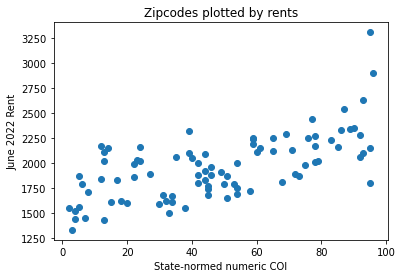

In [109]:
#relationship between rents and vouchers
plt.scatter(vouchers_zillow_coi['r_coi_nat'],vouchers_zillow_coi['2022-06'])
plt.title('Zipcodes plotted by rents')
plt.xlabel('State-normed numeric COI')
plt.ylabel('June 2022 Rent')

In [102]:
vouchers_zillow['2022-06'].corr(vouchers_zillow['Number of vouchers'])

-0.4296357149792754

There is a correlation, with a few outliers, of zip codes with lots of vouchers having lower rents than zip codes with fewer vouchers.

In [107]:
#rents and COI

#merge coi and zillow
vouchers_zillow_coi = pd.merge(vouchers_coi,zillow,how='left',left_on='Zip code',right_on='RegionName')

Text(0, 0.5, 'June 2022 Rent')

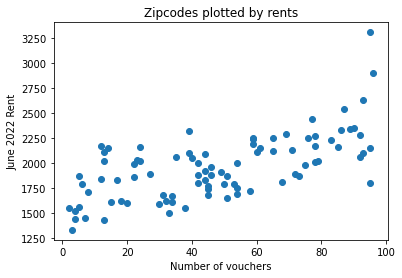

In [111]:
plt.scatter(vouchers_zillow_coi['r_coi_nat'],vouchers_zillow_coi['2022-06'])
plt.title('Zipcodes plotted by rents')
plt.xlabel('Number of vouchers')
plt.ylabel('June 2022 Rent')

In [112]:
vouchers_zillow_coi['2022-06'].corr(vouchers_zillow_coi['r_coi_nat'])

0.6504372708892661

Higher rent zipcodes tend to have higher neighborhood opportunity. 

## Ad Hoc analysis for story 

In [93]:
#top zip code rent 
zillow[zillow['RegionName'] == 85301]

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
347,94883,85301,500,"Phoenix, AZ",546.0,595.0,575.0,587.0,617.0,623.0,...,1217.0,1260.0,1285.0,1282.0,1283.0,1262.0,1293.0,1336.0,1331.0,1328.0


In [95]:
#percentage increase
((1328-546)/546)*100

143.2234432234432

In [96]:
vouchers_sorted.head(30)

,Zip code,Number of vouchers,pct_below_poverty,median_income,pct_white,pct_black,pct_native,pct_asian,pct_islander,pct_other,pct_two,pct_hispanic,percent,quartile,max_rank
78,85301,621,0.311492,38454,0.219439,0.101227,0.012923,0.014802,0.000607,0.000000,0.026987,0.624015,0.052645,first,1.0
29,85041,568,0.162583,58438,0.133551,0.146775,0.009697,0.026308,0.000479,0.000263,0.017956,0.664971,0.048152,first,2.0
69,85281,474,0.328552,42545,0.495339,0.074526,0.017082,0.126248,0.003367,0.001575,0.054569,0.227293,0.040183,first,3.0
9,85015,463,0.278371,42038,0.287526,0.117701,0.027471,0.057260,0.000773,0.001591,0.035106,0.472574,0.039251,first,4.0
43,85201,429,0.198162,46348,0.453181,0.058757,0.038634,0.017277,0.007397,0.000725,0.032361,0.391668,0.036368,first,5.0
4,85008,418,0.210148,46724,0.279562,0.115152,0.024240,0.014668,0.000635,0.000873,0.023034,0.541837,0.035436,first,6.0
61,85251,330,0.103941,71662,0.729251,0.017311,0.011661,0.034694,0.002284,0.000890,0.027169,0.176741,0.027976,first,7.0
28,85040,328,0.295270,43127,0.130371,0.200203,0.025961,0.019294,0.005989,0.005932,0.011130,0.601119,0.027806,first,8.0
15,85021,320,0.208215,46358,0.420407,0.105024,0.036330,0.037446,0.004108,0.019898,0.028470,0.348316,0.027128,first,9.0
70,85282,304,0.133355,61700,0.564242,0.101674,0.020377,0.042491,0.004288,0.001595,0.033525,0.231807,0.025771,first,10.0
